In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
df = pd.read_csv('/content/drive/My Drive/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df.columns = ['sentiment', 'id', 'timestamp', 'query', 'user', 'text']
df

,sentiment,id,timestamp,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
#We are only using these 3 columns as other columns dont any value for the further analysis.
df = df[['sentiment', 'timestamp', 'text']]
df

,sentiment,timestamp,text
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,4,Tue Jun 16 08:40:49 PDT 2009,Just woke up. Having no school is the best fee...
1599996,4,Tue Jun 16 08:40:49 PDT 2009,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Tue Jun 16 08:40:49 PDT 2009,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Tue Jun 16 08:40:49 PDT 2009,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
# Converting sentiment: 4 → 1 (positive), 0 stays 0 (negative)
df['sentiment'] = df['sentiment'].replace(4, 1)
df

<ipython-input-6-0885b3faa0a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].replace(4, 1)


,sentiment,timestamp,text
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,1,Tue Jun 16 08:40:49 PDT 2009,Just woke up. Having no school is the best fee...
1599996,1,Tue Jun 16 08:40:49 PDT 2009,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Tue Jun 16 08:40:49 PDT 2009,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Tue Jun 16 08:40:49 PDT 2009,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
# Lowercasing all the text of the text column
df['text'] = df['text'].str.lower()
df

<ipython-input-7-b2e8e6b44358>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.lower()


,sentiment,timestamp,text
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,@kenichan i dived many times for the ball. man...
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,1,Tue Jun 16 08:40:49 PDT 2009,just woke up. having no school is the best fee...
1599996,1,Tue Jun 16 08:40:49 PDT 2009,thewdb.com - very cool to hear old walt interv...
1599997,1,Tue Jun 16 08:40:49 PDT 2009,are you ready for your mojo makeover? ask me f...
1599998,1,Tue Jun 16 08:40:49 PDT 2009,happy 38th birthday to my boo of alll time!!! ...


In [8]:
# Writing the text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = text.strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)
df

<ipython-input-8-98420a966097>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['text'].apply(clean_text)


,sentiment,timestamp,text,clean_text
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats a bummer you shoulda got david car...
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...
2,0,Mon Apr 06 22:19:53 PDT 2009,@kenichan i dived many times for the ball. man...,i dived many times for the ball managed to sav...
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...
...,...,...,...,...
1599995,1,Tue Jun 16 08:40:49 PDT 2009,just woke up. having no school is the best fee...,just woke up having no school is the best feel...
1599996,1,Tue Jun 16 08:40:49 PDT 2009,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt intervie...
1599997,1,Tue Jun 16 08:40:49 PDT 2009,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...
1599998,1,Tue Jun 16 08:40:49 PDT 2009,happy 38th birthday to my boo of alll time!!! ...,happy th birthday to my boo of alll time tupac...


In [9]:
#Doing Tokenization
df['tokens'] = df['clean_text'].apply(nltk.word_tokenize)
df

<ipython-input-9-f8db223de920>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['clean_text'].apply(nltk.word_tokenize)


,sentiment,timestamp,text,clean_text,tokens
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats a bummer you shoulda got david car...,"[awww, thats, a, bummer, you, shoulda, got, da..."
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb..."
2,0,Mon Apr 06 22:19:53 PDT 2009,@kenichan i dived many times for the ball. man...,i dived many times for the ball managed to sav...,"[i, dived, many, times, for, the, ball, manage..."
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why..."
...,...,...,...,...,...
1599995,1,Tue Jun 16 08:40:49 PDT 2009,just woke up. having no school is the best fee...,just woke up having no school is the best feel...,"[just, woke, up, having, no, school, is, the, ..."
1599996,1,Tue Jun 16 08:40:49 PDT 2009,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt intervie...,"[thewdbcom, very, cool, to, hear, old, walt, i..."
1599997,1,Tue Jun 16 08:40:49 PDT 2009,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...,"[are, you, ready, for, your, mojo, makeover, a..."
1599998,1,Tue Jun 16 08:40:49 PDT 2009,happy 38th birthday to my boo of alll time!!! ...,happy th birthday to my boo of alll time tupac...,"[happy, th, birthday, to, my, boo, of, alll, t..."


In [10]:
# Removing stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df

<ipython-input-10-7713f0147c89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


,sentiment,timestamp,text,clean_text,tokens
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats a bummer you shoulda got david car...,"[awww, thats, bummer, shoulda, got, david, car..."
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,"[upset, cant, update, facebook, texting, might..."
2,0,Mon Apr 06 22:19:53 PDT 2009,@kenichan i dived many times for the ball. man...,i dived many times for the ball managed to sav...,"[dived, many, times, ball, managed, save, rest..."
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]"
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,"[behaving, im, mad, cant, see]"
...,...,...,...,...,...
1599995,1,Tue Jun 16 08:40:49 PDT 2009,just woke up. having no school is the best fee...,just woke up having no school is the best feel...,"[woke, school, best, feeling, ever]"
1599996,1,Tue Jun 16 08:40:49 PDT 2009,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt intervie...,"[thewdbcom, cool, hear, old, walt, interviews,..."
1599997,1,Tue Jun 16 08:40:49 PDT 2009,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...,"[ready, mojo, makeover, ask, details]"
1599998,1,Tue Jun 16 08:40:49 PDT 2009,happy 38th birthday to my boo of alll time!!! ...,happy th birthday to my boo of alll time tupac...,"[happy, th, birthday, boo, alll, time, tupac, ..."


In [11]:
# Doing Lemmatization
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df

<ipython-input-11-d982fb317019>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


,sentiment,timestamp,text,clean_text,tokens
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats a bummer you shoulda got david car...,"[awww, thats, bummer, shoulda, got, david, car..."
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,"[upset, cant, update, facebook, texting, might..."
2,0,Mon Apr 06 22:19:53 PDT 2009,@kenichan i dived many times for the ball. man...,i dived many times for the ball managed to sav...,"[dived, many, time, ball, managed, save, rest,..."
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[whole, body, feel, itchy, like, fire]"
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,"[behaving, im, mad, cant, see]"
...,...,...,...,...,...
1599995,1,Tue Jun 16 08:40:49 PDT 2009,just woke up. having no school is the best fee...,just woke up having no school is the best feel...,"[woke, school, best, feeling, ever]"
1599996,1,Tue Jun 16 08:40:49 PDT 2009,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt intervie...,"[thewdbcom, cool, hear, old, walt, interview, ..."
1599997,1,Tue Jun 16 08:40:49 PDT 2009,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...,"[ready, mojo, makeover, ask, detail]"
1599998,1,Tue Jun 16 08:40:49 PDT 2009,happy 38th birthday to my boo of alll time!!! ...,happy th birthday to my boo of alll time tupac...,"[happy, th, birthday, boo, alll, time, tupac, ..."


In [12]:
# Joining tokens back to text
df['final_text'] = df['tokens'].apply(lambda x: ' '.join(x))
df

,sentiment,timestamp,text,clean_text,tokens,final_text
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats a bummer you shoulda got david car...,"[awww, thats, bummer, shoulda, got, david, car...",awww thats bummer shoulda got david carr third...
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,"[upset, cant, update, facebook, texting, might...",upset cant update facebook texting might cry r...
2,0,Mon Apr 06 22:19:53 PDT 2009,@kenichan i dived many times for the ball. man...,i dived many times for the ball managed to sav...,"[dived, many, time, ball, managed, save, rest,...",dived many time ball managed save rest go bound
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[whole, body, feel, itchy, like, fire]",whole body feel itchy like fire
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,"[behaving, im, mad, cant, see]",behaving im mad cant see
...,...,...,...,...,...,...
1599995,1,Tue Jun 16 08:40:49 PDT 2009,just woke up. having no school is the best fee...,just woke up having no school is the best feel...,"[woke, school, best, feeling, ever]",woke school best feeling ever
1599996,1,Tue Jun 16 08:40:49 PDT 2009,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt intervie...,"[thewdbcom, cool, hear, old, walt, interview, ...",thewdbcom cool hear old walt interview â «
1599997,1,Tue Jun 16 08:40:49 PDT 2009,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...,"[ready, mojo, makeover, ask, detail]",ready mojo makeover ask detail
1599998,1,Tue Jun 16 08:40:49 PDT 2009,happy 38th birthday to my boo of alll time!!! ...,happy th birthday to my boo of alll time tupac...,"[happy, th, birthday, boo, alll, time, tupac, ...",happy th birthday boo alll time tupac amaru sh...


In [13]:
# Dropping unnecessary columns
df.drop(['text', 'clean_text', 'tokens'], axis=1, inplace=True)
df

,sentiment,timestamp,final_text
0,0,Mon Apr 06 22:19:45 PDT 2009,awww thats bummer shoulda got david carr third...
1,0,Mon Apr 06 22:19:49 PDT 2009,upset cant update facebook texting might cry r...
2,0,Mon Apr 06 22:19:53 PDT 2009,dived many time ball managed save rest go bound
3,0,Mon Apr 06 22:19:57 PDT 2009,whole body feel itchy like fire
4,0,Mon Apr 06 22:19:57 PDT 2009,behaving im mad cant see
...,...,...,...
1599995,1,Tue Jun 16 08:40:49 PDT 2009,woke school best feeling ever
1599996,1,Tue Jun 16 08:40:49 PDT 2009,thewdbcom cool hear old walt interview â «
1599997,1,Tue Jun 16 08:40:49 PDT 2009,ready mojo makeover ask detail
1599998,1,Tue Jun 16 08:40:49 PDT 2009,happy th birthday boo alll time tupac amaru sh...


In [14]:
#checking which are the most common words used in tweets and counting them to identify which are the most common topics discussed on twitter.
#Its just the trial and error. I may not get the meaningful insights but still we are doing it to check if we can get any insight from it.
from collections import Counter

# Tokenizing all final texts
all_words = df['final_text'].apply(nltk.word_tokenize)

# Flattening the list of lists
flat_words = [word for tokens in all_words for word in tokens]

# Counting frequency
word_freq = Counter(flat_words)

# Converting to DataFrame to view
freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
freq_df.head(20)

,Word,Frequency
37,im,177371
8,day,104563
194,good,89507
111,get,85921
34,like,79093
28,go,77439
4,got,69830
318,u,67290
103,love,66936
200,dont,66903


In [15]:
# Filtering tweets containing the word "love"
df_love = df[df['final_text'].str.contains(r'\blove\b', case=False)]
df_love.head()

,sentiment,timestamp,final_text
18,0,Mon Apr 06 22:20:31 PDT 2009,ahh ive always wanted see rent love soundtrack
33,0,Mon Apr 06 22:21:11 PDT 2009,awe love miss
115,0,Mon Apr 06 22:27:08 PDT 2009,damn grind inspirational saddening time dont w...
134,0,Mon Apr 06 22:28:04 PDT 2009,im missing babe long alive im happy ya im tire...
188,0,Mon Apr 06 22:32:28 PDT 2009,love french tell people south im qtr french sn...


<ipython-input-16-d48a32c9558e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')


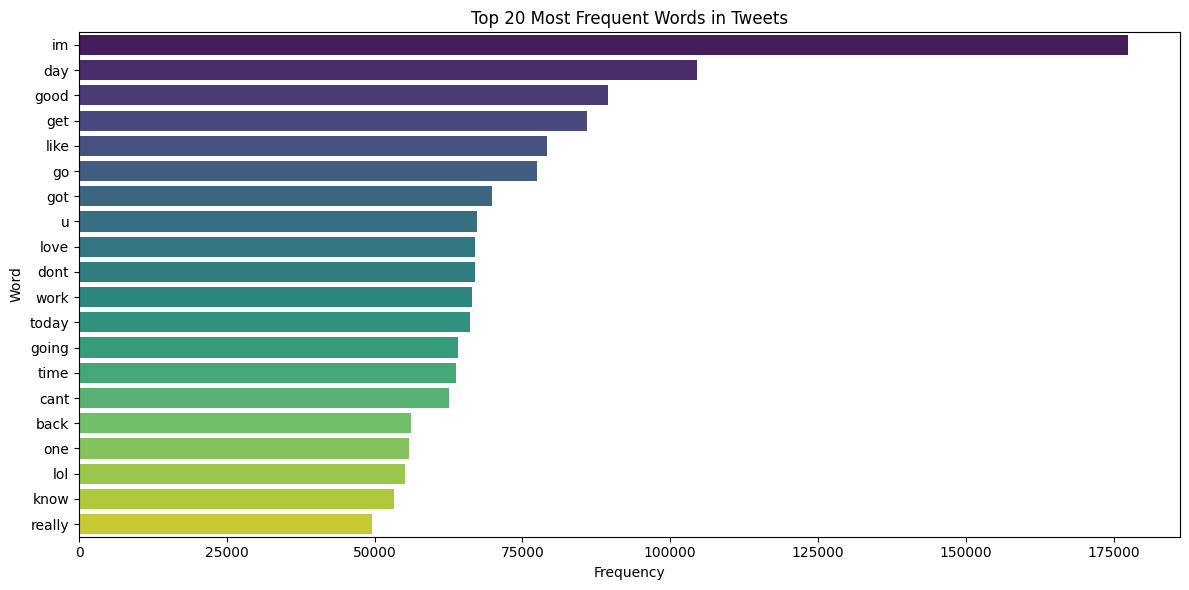

In [16]:
top_words = freq_df.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')
plt.title('Top 20 Most Frequent Words in Tweets')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

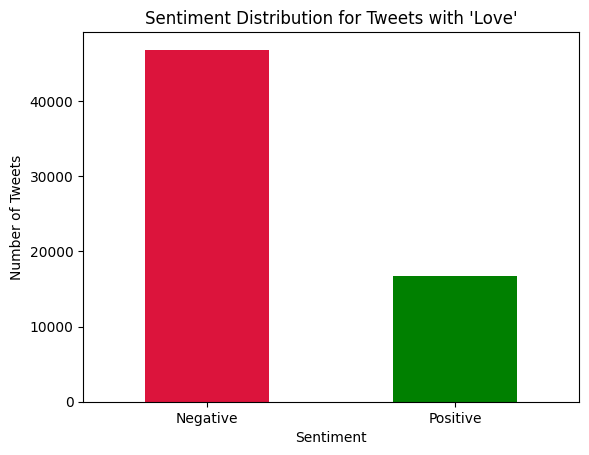

In [17]:
#Visualising Sentiment Distribution for Tweets with 'Love'
df_love['sentiment'].value_counts().plot(kind='bar', color=['crimson', 'green'])
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.title("Sentiment Distribution for Tweets with 'Love'")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

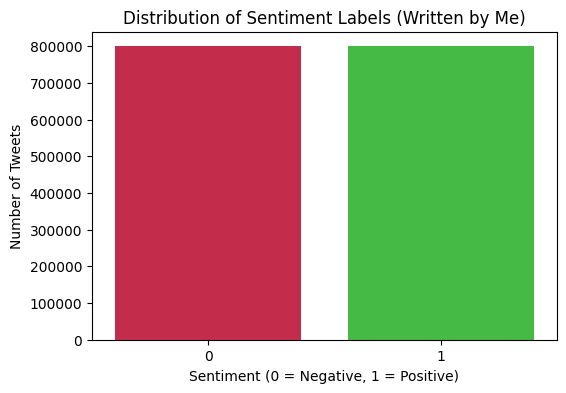

In [18]:
# 📊 Plotting the distribution of tweets across sentiment classes
# This shows how many tweets are positive and negative
df['sentiment'] = df['sentiment'].astype(int)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette={0: 'crimson', 1: 'limegreen'}, legend=False)
plt.title("Distribution of Sentiment Labels (Written by Me)")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Number of Tweets")
plt.show()

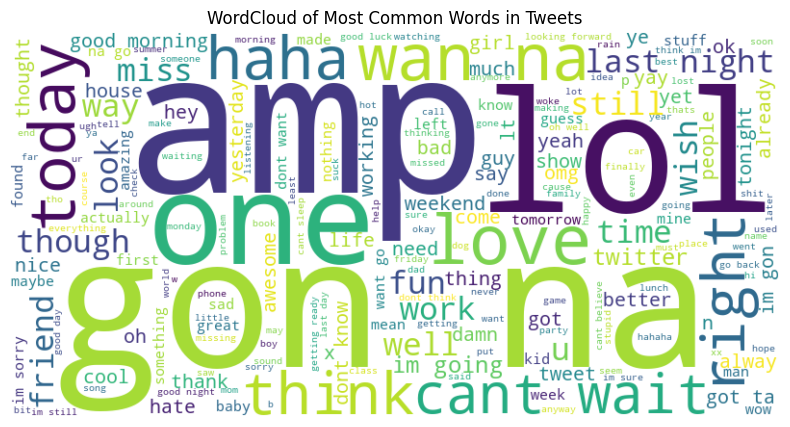

In [19]:
from wordcloud import WordCloud

# ☁️ Creating a WordCloud to visualize most frequent words in tweets
# Using 'final_text' column which contains the cleaned and lemmatized tweets
all_words = ' '.join(df['final_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Most Common Words in Tweets")
plt.show()

<ipython-input-20-ce248db09a80>:5: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['timestamp'] = pd.to_datetime(df['timestamp'])


<Figure size 1200x600 with 0 Axes>

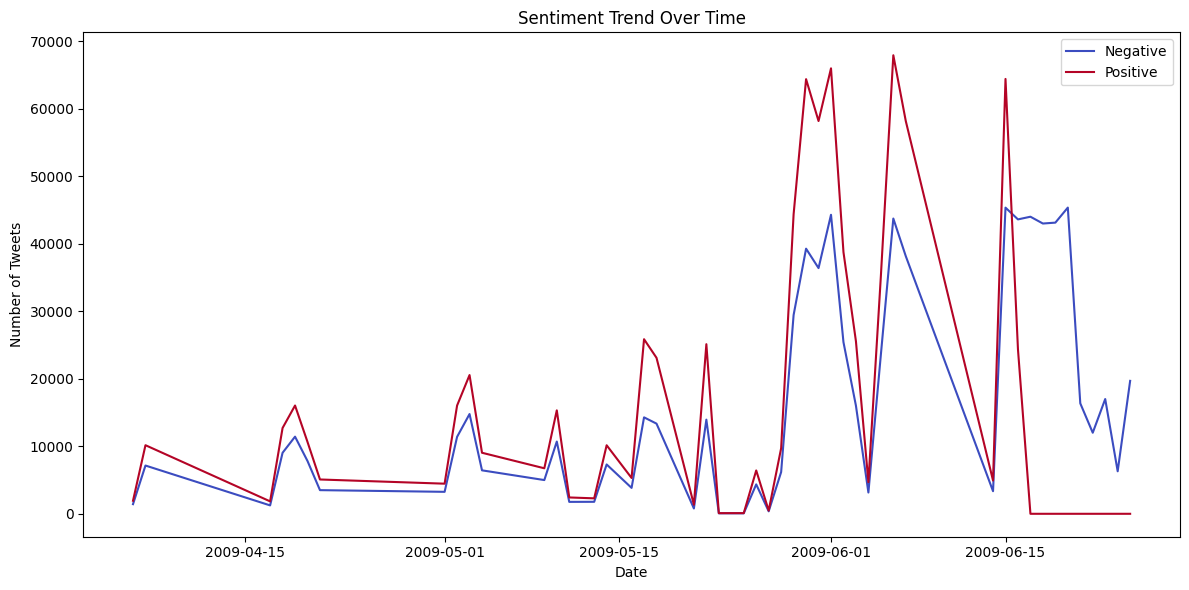

In [20]:
# 📈 Plotting sentiment distribution over time
# ✅ This plot shows how sentiment changes across the timeline in the dataset

# Converting 'timestamp' column to datetime format first
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extracting just the date from the timestamp
df['date'] = df['timestamp'].dt.date  #

# Grouping by date and sentiment, then counting the number of tweets
sentiment_time = df.groupby(['date', 'sentiment']).size().unstack().fillna(0)  #

# Plotting the sentiment trend over time
plt.figure(figsize=(12, 6))
sentiment_time.plot(kind='line', colormap='coolwarm', figsize=(12, 6))  #
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.legend(['Negative', 'Positive'])
plt.tight_layout()
plt.show()

In [21]:
df
#I already dropped timestamp column earlier but when i re runned it, it gave me an error because i have already run that code to drop that column
#Once the column is dropped and if we re run the code it will generate an error so i have not mentioned that part of the code here.

,sentiment,timestamp,final_text,date
0,0,2009-04-06 22:19:45,awww thats bummer shoulda got david carr third...,2009-04-06
1,0,2009-04-06 22:19:49,upset cant update facebook texting might cry r...,2009-04-06
2,0,2009-04-06 22:19:53,dived many time ball managed save rest go bound,2009-04-06
3,0,2009-04-06 22:19:57,whole body feel itchy like fire,2009-04-06
4,0,2009-04-06 22:19:57,behaving im mad cant see,2009-04-06
...,...,...,...,...
1599995,1,2009-06-16 08:40:49,woke school best feeling ever,2009-06-16
1599996,1,2009-06-16 08:40:49,thewdbcom cool hear old walt interview â «,2009-06-16
1599997,1,2009-06-16 08:40:49,ready mojo makeover ask detail,2009-06-16
1599998,1,2009-06-16 08:40:49,happy th birthday boo alll time tupac amaru sh...,2009-06-16


In [22]:
# Feature Engineering: TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features

# Fit and transform the cleaned final_text column
X_tfidf = vectorizer.fit_transform(df['final_text'])

# Optionally check the shape of the resulting matrix
print("TF-IDF matrix shape:", X_tfidf.shape)

TF-IDF matrix shape: (1600000, 5000)


In [23]:
df

,sentiment,timestamp,final_text,date
0,0,2009-04-06 22:19:45,awww thats bummer shoulda got david carr third...,2009-04-06
1,0,2009-04-06 22:19:49,upset cant update facebook texting might cry r...,2009-04-06
2,0,2009-04-06 22:19:53,dived many time ball managed save rest go bound,2009-04-06
3,0,2009-04-06 22:19:57,whole body feel itchy like fire,2009-04-06
4,0,2009-04-06 22:19:57,behaving im mad cant see,2009-04-06
...,...,...,...,...
1599995,1,2009-06-16 08:40:49,woke school best feeling ever,2009-06-16
1599996,1,2009-06-16 08:40:49,thewdbcom cool hear old walt interview â «,2009-06-16
1599997,1,2009-06-16 08:40:49,ready mojo makeover ask detail,2009-06-16
1599998,1,2009-06-16 08:40:49,happy th birthday boo alll time tupac amaru sh...,2009-06-16


In [31]:
# Define target variable
y = df['sentiment']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [32]:
#Logistic Regression Classifier Model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [34]:
# Linear Support Vector Classifier
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [35]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:03:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define evaluation function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    print(f"📊 Evaluation Report for {model_name}\n")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("="*70)

# 🔹 Evaluate All Models
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(nb, X_test, y_test, "Naive Bayes")
evaluate_model(svm, X_test, y_test, "SVM (LinearSVC)")
evaluate_model(xgb, X_test, y_test, "XGBoost")

📊 Evaluation Report for Logistic Regression

Accuracy: 0.772959375
Precision: 0.7628141846008412
Recall: 0.7943379063711014
F1 Score: 0.7782569549359826

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           1       0.76      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000


Confusion Matrix:
 [[119851  39643]
 [ 33010 127496]]
📊 Evaluation Report for Naive Bayes

Accuracy: 0.757325
Precision: 0.7623329744791337
Recall: 0.7500031151483434
F1 Score: 0.7561177830259785

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76    159494
           1       0.76      0.75      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
w

In [37]:
# Adding their accuracy for quick comparison
models = {
    'Logistic Regression': log_reg,
    'Naive Bayes': nb,
    'SVM (LinearSVC)': svm,
    'XGBoost': xgb
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
    }

# Showing in DataFrame
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="F1 Score", ascending=False))

                     Accuracy  Precision    Recall  F1 Score
SVM (LinearSVC)      0.772672   0.760374  0.798381  0.778914
Logistic Regression  0.772959   0.762814  0.794338  0.778257
XGBoost              0.741316   0.706790  0.827583  0.762432
Naive Bayes          0.757325   0.762333  0.750003  0.756118


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Defining parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Initializing model
log_reg = LogisticRegression(max_iter=1000)

# Setting up RandomizedSearchCV
random_search = RandomizedSearchCV(
    log_reg,
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='accuracy'
)

# Fitting on training data
random_search.fit(X_train, y_train)

# Best estimator
best_log_reg = random_search.best_estimator_

# Evaluating tuned model
evaluate_model(best_log_reg, X_test, y_test, "Logistic Regression (Tuned)")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
📊 Evaluation Report for Logistic Regression (Tuned)

Accuracy: 0.7734125
Precision: 0.7631141462947902
Recall: 0.7950543904900751
F1 Score: 0.7787569035486529

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           1       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000


Confusion Matrix:
 [[119881  39613]
 [ 32895 127611]]


In [40]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np

# Defining parameter grid (kept small and efficient)
param_dist_svm = {
    'C': [0.1, 0.5, 1.0, 2.0],
    'loss': ['squared_hinge'],  # Only valid option for LinearSVC
    'dual': [True, False],
    'max_iter': [1000, 1500]
}


# Initializing model
svc = LinearSVC(dual=False)

# RandomizedSearchCV
svc_random = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist_svm,
    n_iter=5,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fitting the model
svc_random.fit(X_train, y_train)

# Best estimator
svc_best = svc_random.best_estimator_

# Predicting and evaluating
y_pred_svc_tuned = svc_best.predict(X_test)

print("📊 Evaluation Report for LinearSVC (Tuned)\n")
print("Accuracy:", accuracy_score(y_test, y_pred_svc_tuned))
print("Precision:", precision_score(y_test, y_pred_svc_tuned))
print("Recall:", recall_score(y_test, y_pred_svc_tuned))
print("F1 Score:", f1_score(y_test, y_pred_svc_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc_tuned))
print("="*70)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
📊 Evaluation Report for LinearSVC (Tuned)

Accuracy: 0.772746875
Precision: 0.7606520383621842
Recall: 0.7980387026030179
F1 Score: 0.7788969933201784

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77    159494
           1       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000


Confusion Matrix:
 [[119189  40305]
 [ 32416 128090]]


In [41]:
import joblib

# 1. Save the trained Logistic Regression model
joblib.dump(best_log_reg, 'logistic_model.pkl')  # or use log_reg if you prefer the untuned one

# 2. Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [42]:
from google.colab import files
files.download('logistic_model.pkl')
files.download('tfidf_vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>